<font size="7"><font color="blue"><center><b>TEAM 5PY FINAL QUESTIONS</b></font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotx
import matplotx.styles
import mplcyberpunk
from datetime import datetime, date
import time
from datetime import date

In [25]:
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_ReadmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")

<font size="5"><b><u>1. Replace all the null values in ReadmissionFlag with 0.</u></b></font>

In [5]:
df_ReadmissionRegistry["ReadmissionFlag"].fillna(0, inplace = True)
df_ReadmissionRegistry

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


<font size="5"><b><u>2. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.</u></b></font>

In [7]:
RFV = input("Enter Reason for visit: ").title()
Count_RFV = len(df_EDvisits[df_EDvisits["ReasonForVisit"]==RFV])
print(Count_RFV)

Enter Reason for visit:  Migraine


156


<font size="5"><b><u>3.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.</u></b></font>

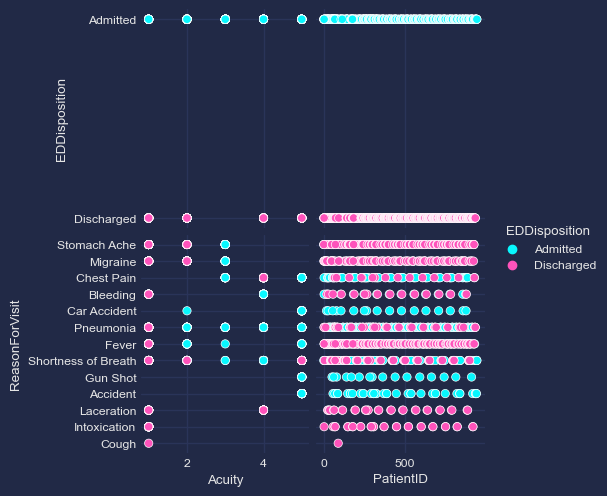

In [36]:
sns.pairplot(data=df_EDvisits, x_vars=["Acuity","PatientID"], y_vars=["EDDisposition","ReasonForVisit"],hue="EDDisposition")
warnings.filterwarnings("ignore")
sns.set(font_scale=.8)
plt.style.use('cyberpunk')
plt.show()

<font size="5"><b><u>4. Find the count of Spanish Speaking patients.</u></b></font>


In [38]:
Count_Spanish = len(df_Patients[df_Patients["Language"]=="Spanish"])
print(Count_Spanish)

110


<font size="5"><b><u>5.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)</u></b></font>

<font size="5"><b><u>6.Find the list of patients whose ExpectedLOS is greater than the value given by the user</u></b></font>

In [42]:
LOS = float(input("Enter Length of Stay:"))
Patients_LOS = (df_ReadmissionRegistry[df_ReadmissionRegistry["ExpectedLOS"]>LOS])
Patients_LOS

Enter Length of Stay: 12


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
6,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198,1.0,5.0,1.0
8,355,10,2018-01-01,2018-01-07 20:50:16.780,Transfer,ICU,Stroke,14.787084,0.106645,1.0,5.0,1.0
9,54,11,2018-01-01,2018-01-08 19:53:38.845,Home,Hospitalist,Pneumonia,12.081905,0.932385,1.0,6.0,1.0
15,146,16,2018-01-01,2018-01-11 00:30:31.743,Home,Hospitalist,AMI,13.828290,0.027476,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
703,503,725,2018-02-22,2018-02-27 09:49:47.888,Home,ICU,Pneumonia,14.078233,0.009793,0.0,NaN,NaN
706,251,729,2018-02-22,2018-02-28 10:43:08.382,Home,Cardiology,Heart Failure,14.646676,0.243620,1.0,10.0,1.0
708,586,731,2018-02-22,2018-03-03 21:51:47.920,Home,Cardiology,Heart Failure,15.435455,0.361812,1.0,1.0,1.0
710,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892,1.0,3.0,1.0


<font size="5"><b><u>7.Create a bar chart between expectedLOS & Primary diagnosis.</u></b></font>

<BarContainer object of 720 artists>

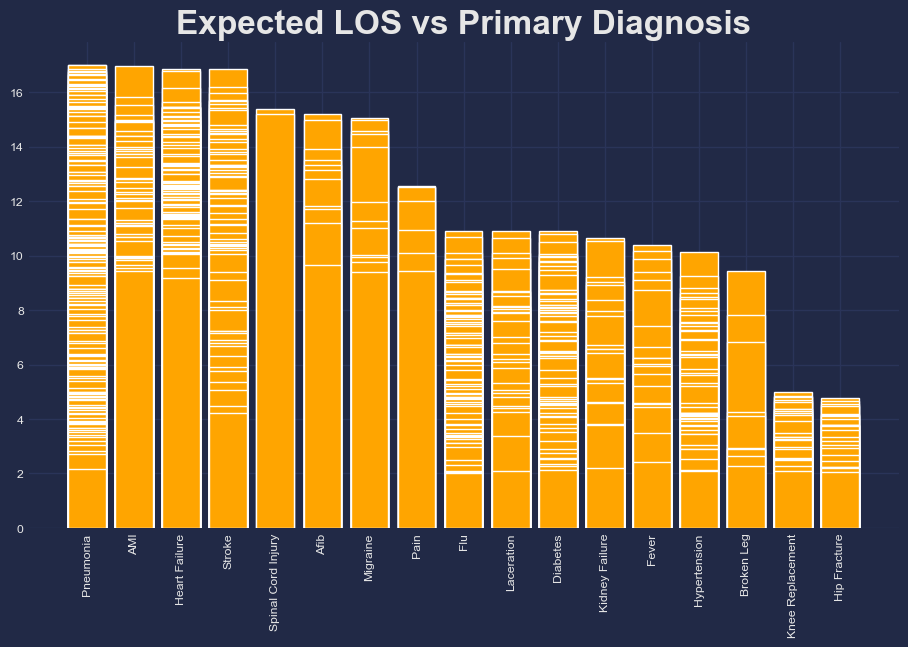

In [47]:
plt.figure(figsize=(10,6))
df_sorted = df_ReadmissionRegistry.sort_values("ExpectedLOS",ascending=False)

plt.xticks(rotation=90)
plt.title("Expected LOS vs Primary Diagnosis", fontsize=24, fontweight="bold")
plt.bar(x=df_sorted["PrimaryDiagnosis"],
height=df_sorted["ExpectedLOS"], color="orange")



<font size="5"><b><u>8.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.</u></b></font>

<font size="5"><b><u>9.Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3)b=np.arange(6).reshape(3,2)</u></b></font>

<font size="5"><b><u>10.Display data by splitting age in 4 quartiles and labeling the quartiles.</u></b></font>

<font size="5"><b><u>11.Calculate average LOS.</u></b></font>

<font size="5"><b><u>12.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.</u></b></font>

<font size="5"><b><u>13.Violin plot for Level of Acuity by Visit Reason</u></b></font>

<font size="5"><b><u>14.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).</u></b></font>

<font size="5"><b><u>15.Count of canceled status.</u></b></font>

<font size="5"><b><u>16.Display total count of patients service wise based on gender.</u></b></font>

<font size="5"><b><u>17.Plot a graph to count the patients based on discharge disposition.</u></b></font>

<font size="5"><b><u>18.Display the data where actual LOS is greater than expected LOS.</u></b></font>

<font size="5"><b><u>19.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).</u></b></font>

<font size="5"><b><u>20.Display using a donut chart the patient count in the ReAdmissionRegistry.</u></b></font>

<font size="5"><b><u>21.Find reasonForVisit with highest count of acuity 5 patients.</u></b></font>

In [49]:
df_Acuity_Filter = df_EDvisits[df_EDvisits['Acuity'] == 5]
df_Acuity_Group = df_Acuity_Filter.groupby('ReasonForVisit').count()
Sorted_Acuity = df_Acuity_Group.sort_values('Acuity', ascending = False)
print("Most patients with an Acuity of 5 have :",Sorted_Acuity.index[0])

Most patients with an Acuity of 5 have : Chest Pain


<font size="5"><b><u>22.Find the visit type with maximum 'No Show'</u></b></font>

In [50]:
dfMax_NoShow = (df_AmbulatoryVisits.query("VisitStatus == 'No Show'").groupby(["VisitType"])["VisitStatus"].count()).sort_values(ascending=False)
print("The visit type with maximum 'No Show' is:" ,dfMax_NoShow.head(1).index[0])

The visit type with maximum 'No Show' is: Telemedicine


<font size="5"><b><u>23.Get the list of patient ID's which are not there in ReadmissionRegistry</u></b></font>

In [51]:
df_Patient_Readm = df_Patients.merge(df_ReadmissionRegistry, on=["PatientID"])
df_Patients[(~df_Patients.PatientID.isin(df_ReadmissionRegistry.PatientID))]["PatientID"].values

array([  4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382,
       383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743,
       744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756,
       757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769,
       770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782,
       783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795,
       796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808,
       809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821,
       822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834,
       835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847,
       848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860,
       861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873,
       874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 88

<font size="5"><b><u>24. Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions)</u></b></font>

In [52]:
df_Reason_EDD = df_EDvisits.groupby(["EDDisposition","ReasonForVisit"]).count()
df_Stacked = df_Reason_EDD.stack()
df_Unstacked = df_Reason_EDD.stack(level=0).unstack()
print(df_Unstacked["PatientID"])

EDDisposition  ReasonForVisit     
Admitted       Accident                39
               Bleeding                16
               Car Accident            17
               Chest Pain              94
               Fever                   46
               Gun Shot                16
               Migraine                47
               Pneumonia              136
               Shortness of Breath     72
               Stomach Ache            32
Discharged     Bleeding                15
               Chest Pain              15
               Cough                    1
               Fever                  188
               Intoxication            30
               Laceration              30
               Migraine               109
               Pneumonia               65
               Shortness of Breath     77
               Stomach Ache           154
Name: PatientID, dtype: int64


<font size="5"><b><u>25.Using a bar chart, which Service had the lowest count of Expected Mortality?</u></b></font>

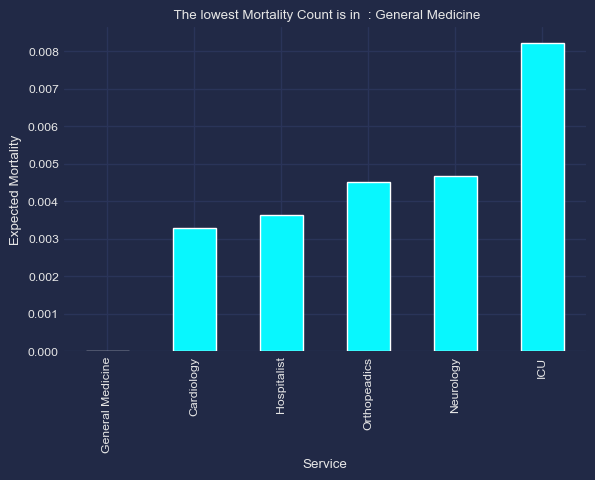

In [53]:
df_Service_Group = (df_Discharges.groupby('Service').ExpectedMortality.min()).sort_values()
Lowest_Mortality = df_Service_Group.idxmin()
ax =df_Service_Group.plot(kind='bar', figsize=(6,4), ylabel='Expected Mortality')
ax.set_title(f' The lowest Mortality Count is in  : {Lowest_Mortality}')
plt.style.use('cyberpunk')
mplcyberpunk.make_lines_glow()
mplcyberpunk.add_gradient_fill(alpha_gradientglow=1.5, gradient_start='zero')
plt.show()


<font size="5"><b><u>26.Using arrays and loops, find the count of patients based on gender</u></b></font>

In [54]:
FindPatients = np.array(df_Patients['Gender'])
male=0
female=0

for i in range(0,len(FindPatients)):
    if FindPatients[i]=='Male':
        male+=1
    elif FindPatients[i]=='Female':
        female+=1
        
        
print("Count of Male patients is :",male)
print("Count of Female patients is :",female)

Count of Male patients is : 537
Count of Female patients is : 408


<font size="5"><b><u>27.Which demographic patients are prone to get stroke?</u></b></font>

In [55]:
df_PatientsDisch = pd.merge(df_Patients,df_Discharges,on=["PatientID"])
df_Stroke = df_PatientsDisch[df_PatientsDisch['PrimaryDiagnosis'] == 'Stroke']
df_RaceStroke = (df_Stroke.groupby('Race').count()).sort_values('PrimaryDiagnosis', ascending=False)
print(df_RaceStroke.index[0] , "'s are most prone to strokes.")

Black/African-American 's are most prone to strokes.


<font size="5"><b><u>28.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive</u></b></font>

In [56]:
df_Patients[(df_Patients['FirstName'].str.contains("lau", case = False) ) | (df_Patients['LastName'].str.contains("lau",case = False))]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


<font size="5"><b><u>29.Display full name of patients who are born in 1986</u></b></font>

In [57]:
(df_Patients["FirstName"]+" "+df_Patients["LastName"]).where(df_Patients['DateOfBirth'].dt.year == 1986).dropna()

23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object

<font size="5"><b><u>30.Retrieve the row with minimum DBP using sorting technique</u></b></font>

In [58]:
df_AmbulatoryVisits.sort_values(by=["BloodPressureDiastolic"]).head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


<font size="5"><b><u>31.Find the last name of the patients, by getting the first name from the user</u></b></font>

In [60]:
PatName = input("Enter first name of patient: ").title()
LastName=df_Patients["LastName"].where(df_Patients['FirstName'] == PatName).dropna()
print(LastName)

Enter first name of patient:  Gabriel


14       Saint
135    Walkden
Name: LastName, dtype: object


<font size="5"><b><u>32.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery</u></b></font>

In [61]:
df_Providers.loc[df_Providers['ProviderID'].between(11, 20) & (df_Providers['ProviderSpecialty'] == 'Surgery')]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


<font size="5"><b><u>33.Which reason of visit has maximum mortality rate</u></b></font>

In [62]:
df_Discharges.loc[df_Discharges["ExpectedMortality"].idxmax()]

AdmissionID                                    190
PatientID                                      572
AdmissionDate                  2018-02-14 00:00:00
DischargeDate           2018-02-25 13:02:30.113000
DischargeDisposition                       Expired
Service                                  Neurology
PrimaryDiagnosis                         Pneumonia
ExpectedLOS                              10.372029
ExpectedMortality                         0.989945
Name: 88, dtype: object

<font size="5"><b><u>34.Find the count of White Spanish Male</u></b></font>

In [63]:
df_WhiteSpanishMale = df_Patients[(df_Patients['Race']=='White') & (df_Patients['Gender']=='Male') & (df_Patients['Language']=='Spanish')]
CntWSM = len(df_WhiteSpanishMale)
print("There are", CntWSM,"White Spanish Males in this dataset")

There are 15 White Spanish Males in this dataset


<font size="5"><b><u>35.Create a jointplot on expected mortality & expected length of stay<b></u></b></font>

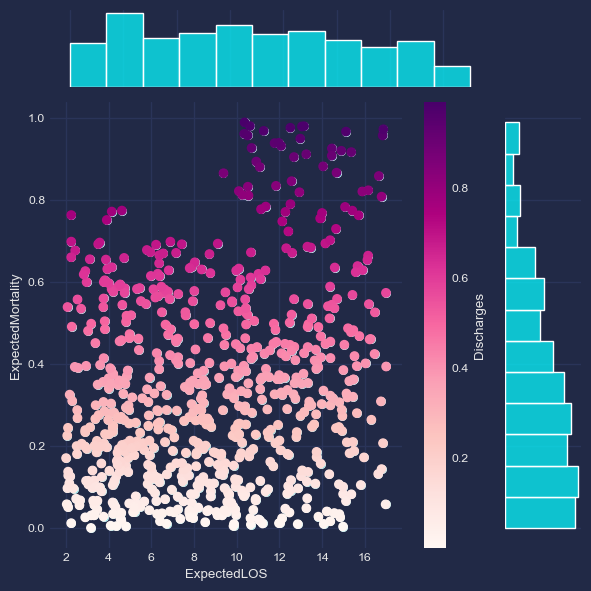

In [64]:
x = df_Discharges['ExpectedLOS']
y = df_Discharges['ExpectedMortality']
sns.jointplot(data=df_Discharges, x='ExpectedLOS', y='ExpectedMortality')
with plt.style.context(matplotx.styles.pitaya_smoothie['dark']):
    plt.scatter(x, y, c=y)
    plt.colorbar(label='Discharges')
    plt.xlabel('ExpectedLOS')
    plt.ylabel('ExpectedMortality')
    plt.show()

<font size="5"><b><u>36. Create a heat map on Readmission Registry table to find correlation between columns values</u></b></font>

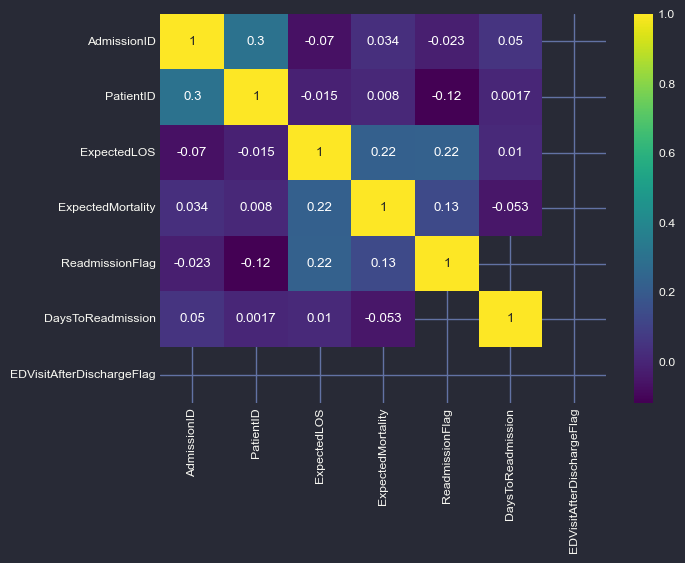

In [65]:
df_Corr_Numeric = df_ReadmissionRegistry.corr(numeric_only=True)
with plt.style.context(matplotx.styles.dracula):
    sns.heatmap(df_Corr_Numeric,cmap = "viridis", annot=True)
    plt.show()

<font size="5"><b><u>37.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?</u></b></font>

In [66]:
df_DiagnosisDiff = df_Discharges.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(lambda x: max(x) - min(x))
df_SortedDiagnosis = df_DiagnosisDiff.sort_values(ascending=False)
print("The biggest difference between max and min ExpectedLOS was seen in: ",df_SortedDiagnosis.index[0])

The biggest difference between max and min ExpectedLOS was seen in:  Pneumonia


<font size="5"><b><u>38.Mortality O:E</u></b></font>

In [67]:
ObsMortality = len(df_Discharges[df_Discharges['DischargeDisposition']=='Expired'])
ExpMortality = df_Discharges['ExpectedMortality'].sum().round(2).astype(int)
M_OE = (ObsMortality/ExpMortality)
print("Th Observed:Expected mortality ratio is", round(M_OE,2))

Th Observed:Expected mortality ratio is 0.43


<font size="5"><b><u>39.Create a figure object called fig using plt.figure() **
** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
    ** Plot (x,y) on that axes and set the labels.</b></u> <br></font>
<font size="2">The QB style library is used to analyze complex multidimensional arrays. Although this is not a complex graph. The freedom to plot on any X and Y axis allows us to experiment with this style </font>

In [ ]:
pip install qbstyles

In [69]:
from qbstyles import mpl_style

In [70]:
mpl_style(dark=True)

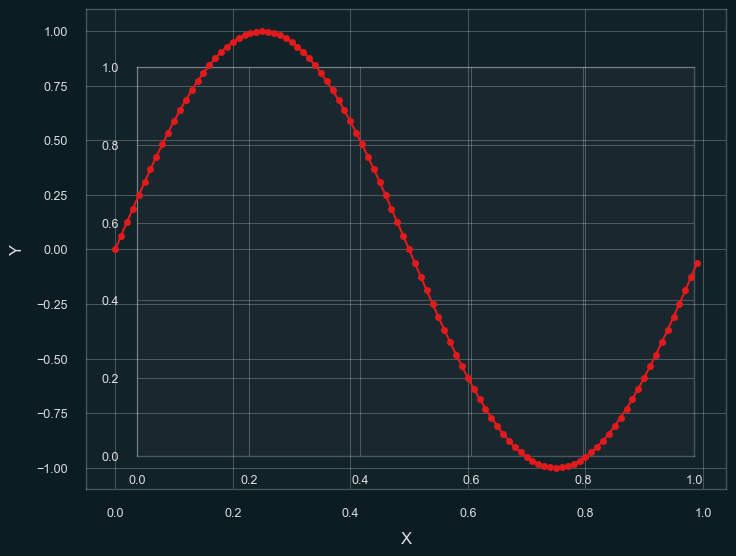

In [71]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])
x = np.arange(0.0, 1.0, 0.01)
y = np.sin(2 * np.pi * x)
plt.plot(x, y, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<font size="5"><b><u>40.Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos</u></b></font>

In [72]:
LOSDiff = df_Discharges['ExpectedLOS'].max() - df_Discharges['ExpectedLOS'].min() 
df_Discharges[df_Discharges['ExpectedLOS'] > LOSDiff]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
12,398,134,2018-01-10,2018-01-15 16:43:47.026,Expired,ICU,Pneumonia,16.225126,0.460186
24,368,178,2018-01-14,2018-01-18 13:44:53.072,Expired,ICU,Spinal Cord Injury,15.183750,0.318426
31,369,198,2018-01-15,2018-01-31 14:28:07.437,Expired,ICU,Spinal Cord Injury,15.369330,0.082132
36,406,230,2018-01-18,2018-02-01 20:55:30.903,Expired,Cardiology,Afib,15.212173,0.487404
47,174,352,2018-01-29,2018-02-02 21:21:45.388,Expired,ICU,Pneumonia,16.989907,0.573870
87,295,560,2018-02-13,2018-02-26 18:17:22.826,Expired,Neurology,Heart Failure,16.785926,0.808604
92,297,588,2018-02-15,2018-02-26 14:46:54.780,Expired,Neurology,Stroke,15.958583,0.172149
101,691,709,2018-02-21,2018-03-01 08:44:33.655,Expired,Cardiology,Heart Failure,15.471412,0.362760
110,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198
119,252,19,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003


<font size="5"><b><u>41. Plot a graph to show the distribution of expected length of stay.</u></b></font>

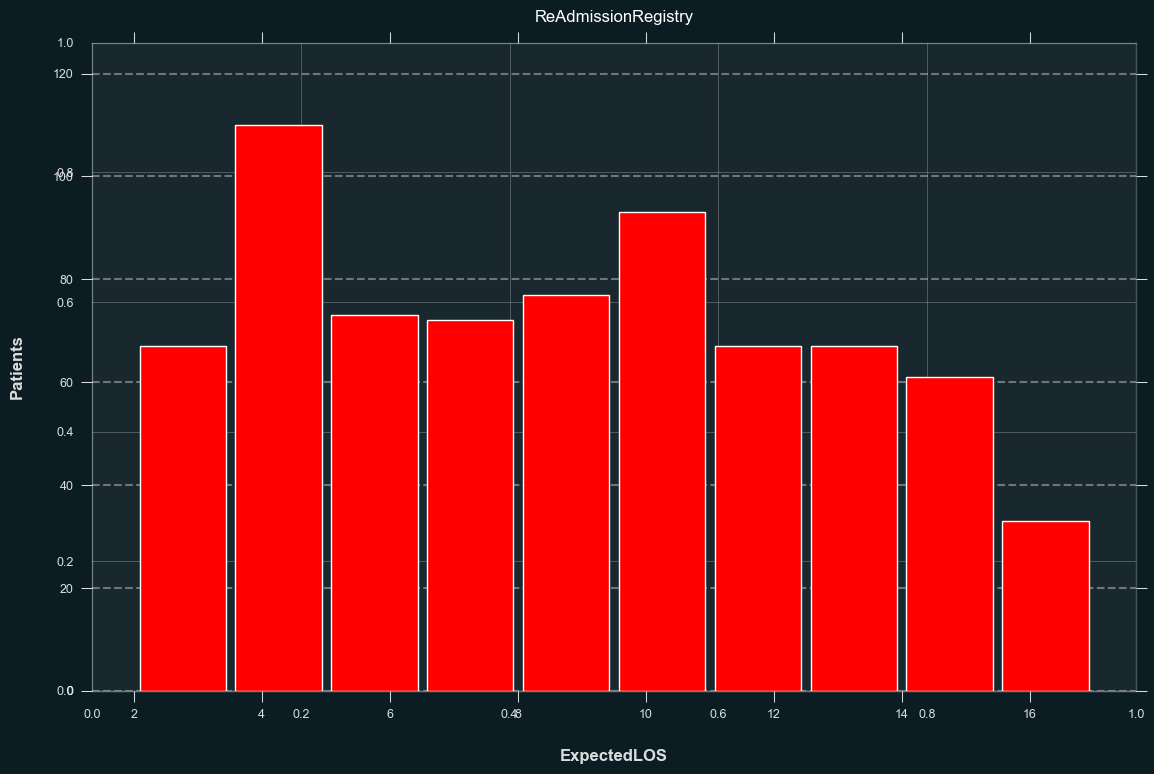

In [74]:
# 41. Plot a graph to show the distribution of expected length of stay.

Elos1 = df_ReadmissionRegistry.hist(column='ExpectedLOS', bins=10, grid=False, figsize=(12,8), color ='red', zorder=2, rwidth=0.9)
Elos1 = Elos1[0]
for x in Elos1 :
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("ReAdmissionRegistry")

    # Set x-axis label
    x.set_xlabel("ExpectedLOS", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Patients", labelpad=20, weight='bold', size=12)
   
    plt.show()

<font size="5"><b><u>42. Delete the column 'DischargeDispostion' iteratively.
</u></b></font>

In [75]:
# 42. Delete the column 'DischargeDispostion' iteratively.

sheets = [df_Patients, df_EDvisits, df_AmbulatoryVisits, df_ReadmissionRegistry, df_Discharges, df_Providers, df_EDunique]
#col = 'DischargeDispostion'
for df in sheets:
    for col in df.columns:
        if 'DischargeDisposition' in col:
            #df.drop('DischargeDisposition', axis=1, inplace=True)
            del df['DischargeDisposition']
print(sheets, "\n")

[     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3             

<font size="5"><b><u>43.Find the age prone to get stroke.</u></b></font>

In [3]:
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])
current_date = datetime.today()
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365
df_Patients = df_Patients.drop(columns=['FirstName', 'LastName','DateOfBirth','Gender','Race','Language'])
df_PatientsNew = pd.merge(df_Patients,df_Discharges,on=["PatientID"])
df_Stroke = df_PatientsNew[df_PatientsNew['PrimaryDiagnosis'] == 'Stroke']                              
df_Age = (df_Stroke.groupby(df_Patients['Age']).count()).sort_values('PrimaryDiagnosis', ascending=False)                               
print("The Age", df_Age.index[0] , "is  prone to strokes.")

The Age 38 is  prone to strokes.


<font size="5"><b><u>44. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.</u></b></font>

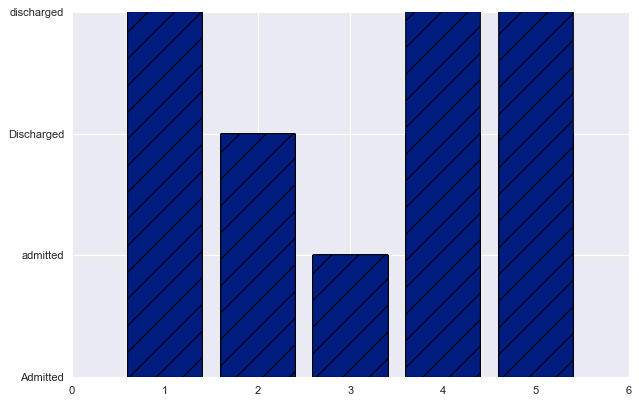

In [92]:
plt.bar(x = df_EDunique['Acuity'], height = df_EDunique['EDDisposition'], edgecolor='black', hatch='/')
plt.style.use('Solarize_Light2')
plt.show()

<font size="5"><b><u>45. Usage of Enumeration in Python with any example.</u></b></font>

In [4]:
test = df_EDunique['ReasonForVisit']
for i,j in enumerate(test):
    if i < 5 :
        i = i+1
        print(i, j)
    

1 Stomach Ache
2 Migraine
3 Stomach Ache
4 Migraine
5 Chest Pain


<font size="5"><b><u>46. Create a heat map to show the correlation between the column values of Edvisits.</u></b></font>

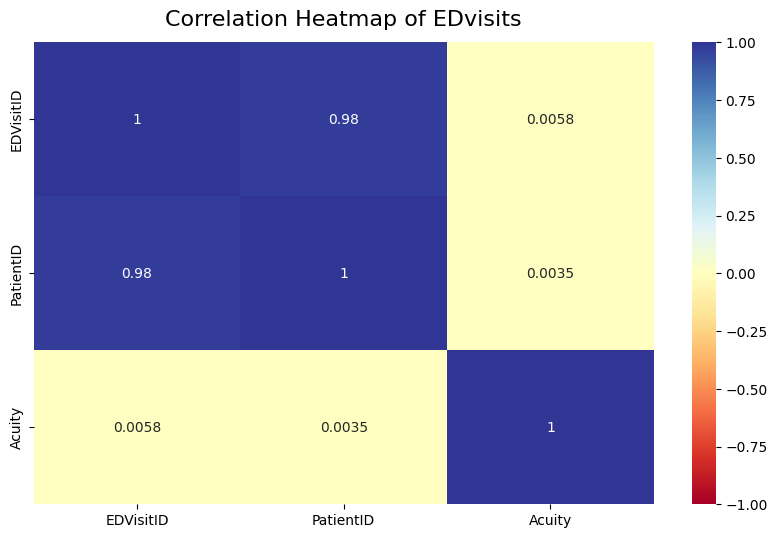

In [13]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_EDvisits.corr(numeric_only=True), vmin=-1, vmax=1, annot=True,cmap = "RdYlBu")
heatmap.set_title('Correlation Heatmap of EDvisits', fontdict={'fontsize':16}, pad=12);
plt.show()

<font size="5"><b><u>47. Create a WordCloud Chart with Reason For Visit.</u></b></font>

In [14]:
from wordcloud import WordCloud

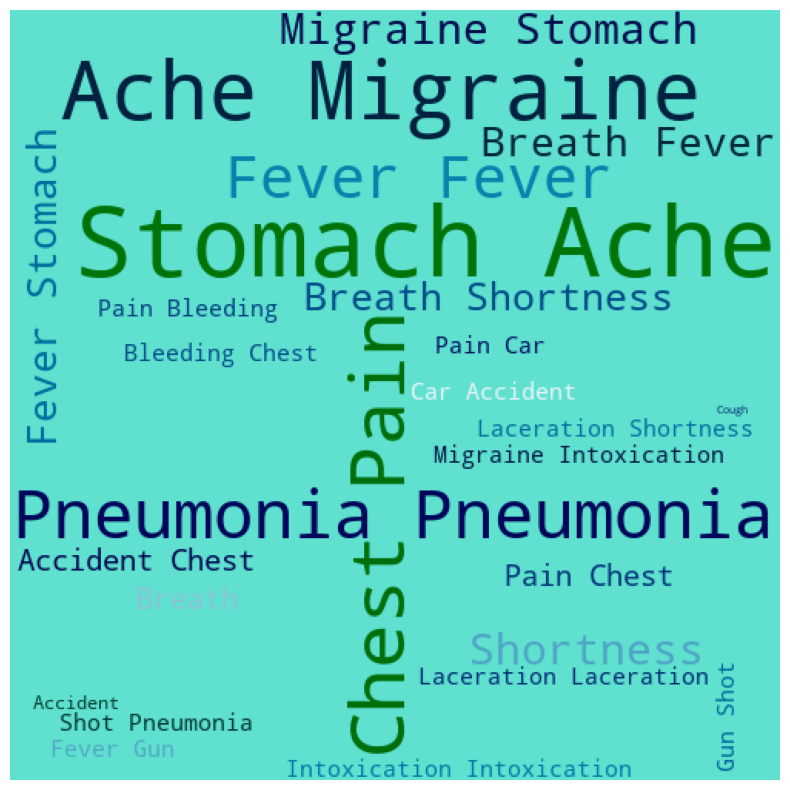

In [17]:
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
text = df_EDvisits['ReasonForVisit'].tolist()
text_join = ' '.join(text)
wordcloud = WordCloud(width = 500, height = 500, background_color='#60E1D0', colormap="ocean",  random_state=10).generate(text_join)
plot_cloud(wordcloud)

<font size="5"><b><u>48. List male patients over the age of 60 who have undergone surgery from January-March 2019.</u></b></font>

<font size="5"><b><u>49. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.</u></b></font>

In [26]:
df_Acuity_Rfv = df_EDvisits.drop(columns=['EDVisitID', 'VisitDate', 'EDDischargeTime', 'ReasonForVisit'])

df_NoPatients = df_Acuity_Rfv.groupby(['EDDisposition', 'Acuity']).size().unstack()


df_NoPatients

Acuity,1,2,3,4,5
EDDisposition,,,,,
Admitted,32.0,116.0,81.0,107.0,179.0
Discharged,558.0,66.0,NaN,30.0,30.0


<font size="5"><b><u>50. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
</u></b></font>

In [77]:
df_Patients.loc[101:200,['FirstName','LastName']]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


<font size="5"><b><u>51.np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.</u></b></font>

<font size="5"><b><u>52.Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.</u></b></font>

<font size="5"><b><u>53.Add column 'Age' in Patient table.</u></b></font>

In [27]:
df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])

current_date = datetime.today()

# Calculate age based on the difference between the current date and birth date
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365

df_Patients.head(5)


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,61


<font size="5"><b><u>54.Display the data for all 'White Female' patients above the age of 50.</u></b></font>

<font size="5"><b><u>55.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.</u></b></font>

<font size="5"><b><u>56.Create a bar chart on service & expected length of stay.</u></b></font>

<font size="5"><b><u>57.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.</u></b></font>

<font size="5"><b><u>58.Get the  number of patients based on service and primary diagnosis.</u></b></font>

<font size="5"><b><u>59.Display the patient details with maximum pulse pressure.</u></b></font>

<font size="5"><b><u>60.Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)</u></b></font>

<font size="5"><b><u>61.Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)</u></b></font>

In [78]:
df_hyper = df_AmbulatoryVisits.query("BloodPressureSystolic > 180 and BloodPressureDiastolic > 120")
print(df_hyper.count()[0])

101


<font size="5"><b><u>62.Which patient id has most entries in readmission registry.</u></b></font>

In [79]:
df_patient_entry_count = df_ReadmissionRegistry.groupby(["PatientID"])['PatientID'].count()

print(df_patient_entry_count.reset_index(name='count').sort_values(by='count',ascending = False).head(1))

    PatientID  count
21         23      3


<font size="5"><b><u>63.If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.</u></b></font>

In [80]:
df_Male =  (df_Patients[df_Patients['Gender'] == 'Male'])
df_Male_name = 'Mr ' + df_Male["FirstName"].str.cat(df_Male["LastName"], sep=" ")
print(df_Male_name)

df_Female =  (df_Patients[df_Patients['Gender'] == 'Female'])
df_Female_name = 'Ms ' + df_Female["FirstName"].str.cat(df_Female["LastName"], sep=" ")
print(df_Female_name)

0             Mr Lanni Sue
1             Mr Far Myers
2       Mr Devlin  Michael
3         Mr Carmine Texas
4            Mr Tann  Bama
              ...         
940         Mr Wat Fideler
941     Mr Wandie Baythrop
942     Mr Diahann Smeeton
943    Mr Panchito Sharple
944        Mr Walsh Calvie
Name: FirstName, Length: 537, dtype: object
25           Ms Sally Bing
26            Ms Mike Bing
27          Ms Jordan Ross
28            Ms Ted Scott
29          Ms Ala Halpert
              ...         
914      Ms Jerrilyn Dyson
915      Ms Kaylil Baldack
916     Ms Velvet Bushnell
917          Ms Kiri Allom
918    Ms Champlin Bulford
Name: FirstName, Length: 408, dtype: object


<font size="5"><b><u>64.Plot a graph by counting the no. of patients in each department.</u></b></font>

Service
Cardiology           95
General Medicine    263
Hospitalist         101
ICU                 151
Neurology            65
Orthopeadics         45
Name: Service, dtype: int64


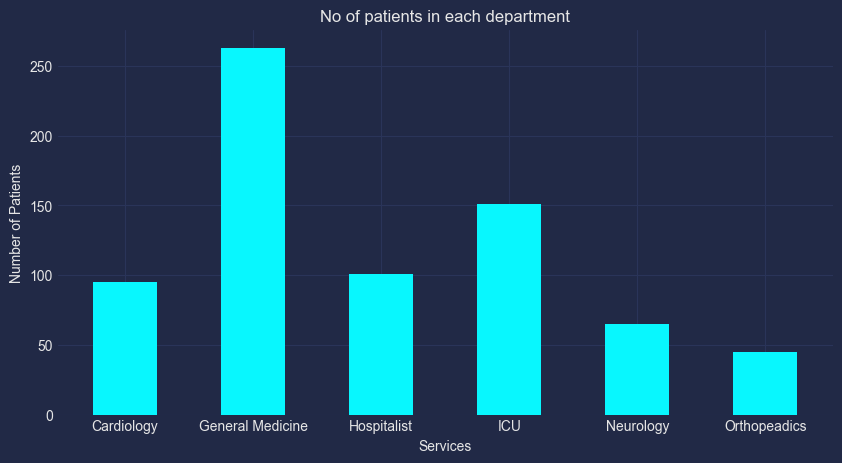

In [12]:
df_graph = df_ReadmissionRegistry.groupby(["Service"])['Service'].count()
print(df_graph)

data = df_graph.to_dict()
services = list(data.keys())
noOfPatient = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
plt.bar(services, noOfPatient, width = 0.5)
plt.style.use('cyberpunk')

plt.xlabel("Services")
plt.ylabel("Number of Patients")
plt.title("No of patients in each department")
plt.show()

<font size="5"><b><u>65.Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.</u></b></font>

In [3]:
df_Hypertension=df_AmbulatoryVisits.dropna(subset=['BloodPressureSystolic'])
bins=[120,140,160,180,190]
bin_labels=['Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension']
my_data = pd.cut(df_Hypertension['BloodPressureSystolic'],bins,labels=bin_labels) 
pd.concat([d.reset_index(drop=True) for d in [df_AmbulatoryVisits['PatientMRN'],df_AmbulatoryVisits['BloodPressureSystolic'], my_data]], axis=1)

,PatientMRN,BloodPressureSystolic,BloodPressureSystolic
0,840,188.0,Severe Hypertension
1,820,179.0,High Hypertension
2,879,133.0,Mild Hypertension
3,884,132.0,Mild Hypertension
4,32,131.0,Mild Hypertension
...,...,...,...
945,873,187.0,NaN
946,855,182.0,NaN
947,865,150.0,NaN
948,635,177.0,NaN


<font size="5"><b><u>66.Plot a graph showing the count of patients for the reason visited the hospital.</u></b></font>

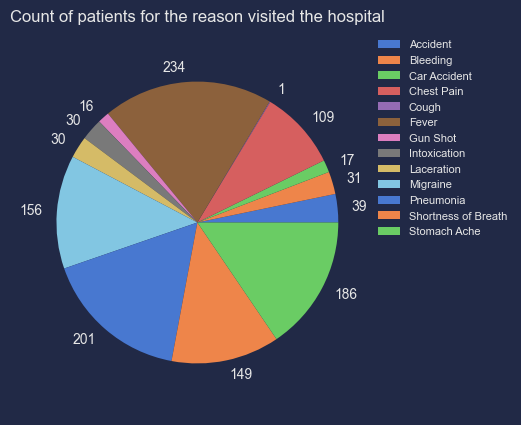

In [14]:
df_size = df_EDvisits.groupby(['ReasonForVisit'])['PatientID'].count()
data = df_size.to_dict()
dd = list(data.keys())
count = list(data.values())

plt.figure(figsize=(4, 5)) 
plt.pie(count, labels= df_size)
plt.axis('equal')

plt.title('Count of patients for the reason visited the hospital')

plt.legend(dd, bbox_to_anchor=(1.05, 1.0), loc="upper left", fontsize='8')
sns.set_palette("pastel")


plt.show()


<font size="5"><b><u>67.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.</u></b></font>

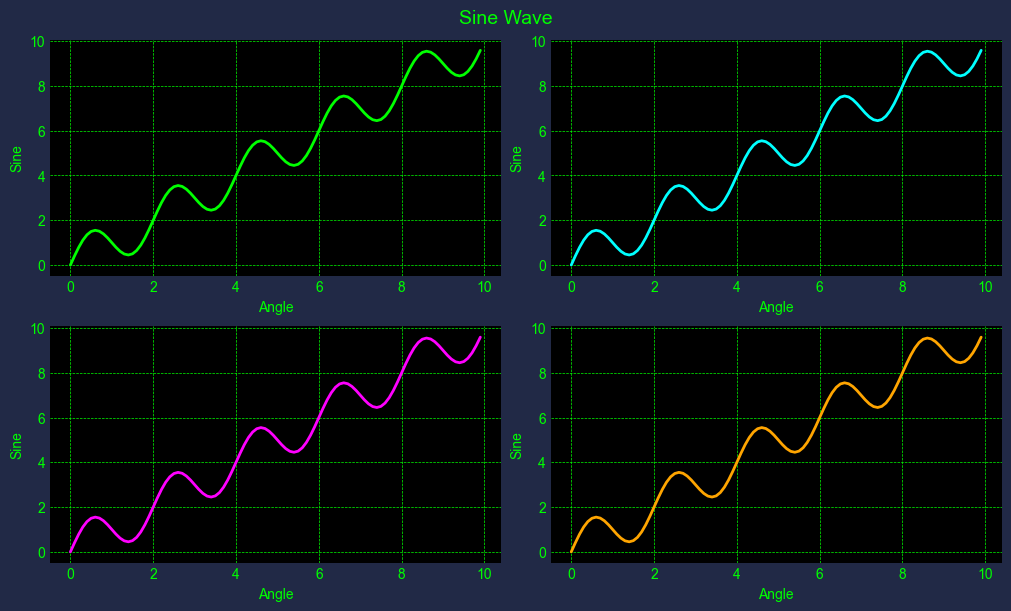

In [15]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(10, 6))

fig.suptitle('Sine Wave', fontsize=14, color='lime')

neon_colors = ['lime', 'cyan', 'magenta', 'orange']

for i, ax in enumerate(axs.flat):
    ax.plot(x, y, color=neon_colors[i], linewidth=2)
    ax.set_xlabel('Angle', color='lime')
    ax.set_ylabel('Sine', color='lime')
    ax.spines['bottom'].set_color('lime')
    ax.spines['left'].set_color('lime')
    ax.xaxis.label.set_color('lime')
    ax.yaxis.label.set_color('lime')
    ax.tick_params(axis='x', colors='lime')
    ax.tick_params(axis='y', colors='lime')
    ax.grid(color='lime', linestyle='--', linewidth=0.5)
    ax.set_facecolor('black')

plt.show()


<font size="5"><b><u>68.Make a pivot table by the no. of patients from the admission date till discharge date.</u></b></font>

In [17]:
df_table = df_ReadmissionRegistry.pivot_table( index=['AdmissionDate','DischargeDate'], 
                                              values='PatientID',
                                              aggfunc='count')
df_table

PatientID
AdmissionDate DischargeDate                     
2018-01-01    2018-01-04 19:59:31.391          1
              2018-01-04 21:28:51.898          1
              2018-01-04 22:28:23.672          1
              2018-01-05 05:47:04.933          1
              2018-01-05 14:18:30.029          1
...                                          ...
2018-02-22    2018-03-07 21:22:10.061          1
              2018-03-08 02:43:18.749          1
              2018-03-08 09:27:18.377          1
              2018-03-10 06:06:12.068          1
              2018-03-10 20:38:30.568          1

[720 rows x 1 columns]

<font size="5"><b><u>69.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.</u></b></font>

In [83]:
df_ReadmissionRegistry['lengthOfStay'] = (df_ReadmissionRegistry['DischargeDate'] - df_ReadmissionRegistry['AdmissionDate']).dt.days


df_ReadmissionRegistry.groupby(["Service", "PrimaryDiagnosis"])['lengthOfStay'].mean()

Service           PrimaryDiagnosis  
Cardiology        AMI                   10.250000
                  Afib                  11.200000
                  Broken Leg            10.666667
                  Flu                   12.000000
                  Heart Failure          9.512821
                  Kidney Failure         4.000000
General Medicine  Broken Leg            13.000000
                  Diabetes              10.289474
                  Fever                  8.000000
                  Flu                    9.888889
                  Hypertension           8.914286
                  Kidney Failure        10.666667
                  Laceration             9.428571
                  Pneumonia              9.417910
                  Stroke                11.250000
Hospitalist       AMI                   10.000000
                  Broken Leg             7.666667
                  Diabetes               8.846154
                  Fever                 10.666667
             

<font size="5"><b><u>70.Create a visualization on the count of patients based on primary diagnosis.</u></b></font>

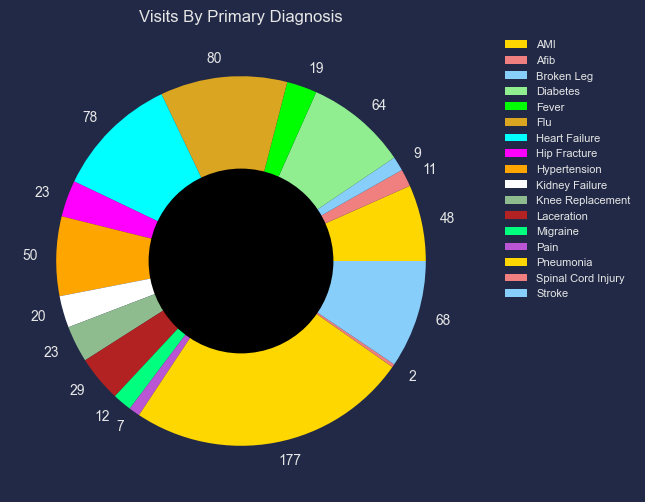

In [22]:
df_size = df_ReadmissionRegistry.groupby(['PrimaryDiagnosis'])['PatientID'].count()
data = df_size.to_dict()
dd = list(data.keys())
count = list(data.values())

colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen','lime','goldenrod', 'cyan', 'magenta', 'orange','white','darkseagreen','firebrick','springgreen','mediumorchid']

plt.figure(figsize=(8, 6))

plt.pie(count, labels= df_size, colors=colors)
centre_circle = plt.Circle((0, 0), 0.50, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Visits By Primary Diagnosis')

# Add Legends
plt.legend(dd, bbox_to_anchor=(1.05, 1.0), loc="upper left", fontsize='8')

# show the graph
plt.show()

<font size="5"><b><u>71.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.</u></b></font>

In [3]:
df_Providers[['First Name', 'Last Name']] = df_Providers.ProviderName.str.split(" ", expand = True)
print(df_Providers)

    ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff  \
0            1        Sally Sue        Pediatrics 1993-01-01 00:00:00.000   
1            2       Mike Myers        Pediatrics 1993-05-02 00:00:17.695   
2            3   Jordan Michael        Pediatrics 1993-06-24 21:31:46.687   
3            4        Ted Texas        Pediatrics 1993-12-23 21:33:52.299   
4            5         Ala Bama        Pediatrics 1995-01-10 02:53:47.838   
5            6       Harry Kane        Pediatrics 1995-07-21 03:49:03.310   
6            7        Barry Bar        Pediatrics 1995-11-21 19:30:38.759   
7            8        Ted Green        Pediatrics 1996-05-30 06:14:52.539   
8            9        Ted Black        Pediatrics 1997-02-20 08:01:10.211   
9           10         Fred Man           Surgery 1998-03-17 01:47:18.794   
10          11     Kim Kimberly           Surgery 1998-05-10 14:47:29.468   
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762   

<font size="5"><b><u>72.Create a boxplot on ExpectedLOS by taking service into account.</u></b></font>

Text(0, 0.5, 'Expected Length of Stay')

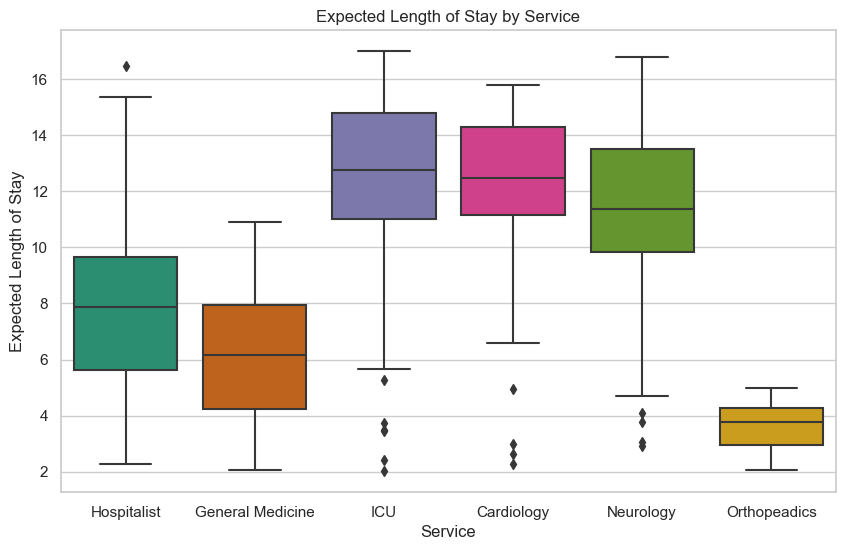

In [11]:
sns.set(style="whitegrid", palette="Dark2")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ReadmissionRegistry, x="Service",y="ExpectedLOS")
plt.title("Expected Length of Stay by Service")
plt.xlabel("Service")
plt.ylabel("Expected Length of Stay")

<font size="5"><b><u>73.Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).</u></b></font>

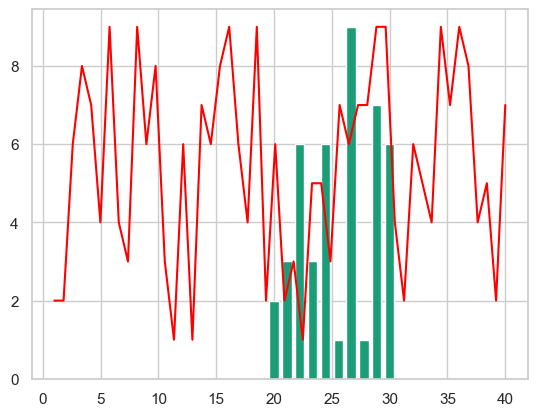

In [15]:
df = pd.DataFrame()
df['x'] = np.linspace(20, 30, 10)
df['y'] = np.random.randint(1, 10, 10)

df2 = pd.DataFrame()
df2['x'] = np.linspace(1, 40, 50)
df2['y'] = np.random.randint(1, 10, 50)

fig, ax = plt.subplots()

ax.bar(x=df.x, height=df.y)
ax.plot(df2.set_index('x'), c='red')

<font size="5"><b><u>74.Number of patients on 'Transfer' based on primary diagnosis.</u></b></font>

In [16]:
df_transfer= df_ReadmissionRegistry[df_ReadmissionRegistry["DischargeDisposition"] == 'Transfer'] 
print(df_transfer.groupby(['PrimaryDiagnosis'])['PatientID'].count())

PrimaryDiagnosis
Afib                1
Diabetes            7
Flu                 2
Heart Failure       9
Knee Replacement    1
Laceration          1
Pain                1
Pneumonia           8
Stroke              9
Name: PatientID, dtype: int64


<font size="5"><b><u>75.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.</u></b></font>

In [17]:
maxValues = df_AmbulatoryVisits.BloodPressureSystolic.idxmax()
df_AmbulatoryVisits.loc[maxValues]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

<font size="5"><b><u>76.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.</u></b></font>

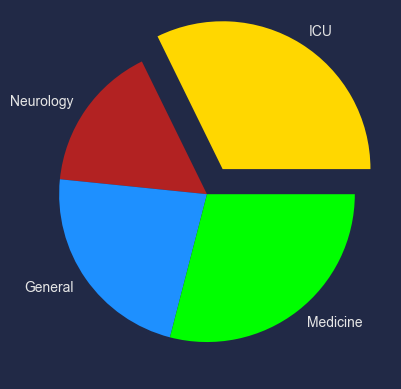

In [29]:
y = np.array([10,5,7,9])
mylabels = ["ICU", "Neurology", "General", "Medicine"]
myexplode = [0.2, 0, 0, 0]

colors1= ['gold', 'firebrick', 'dodgerblue','lime']

plt.pie(y, labels = mylabels, explode = myexplode,colors=colors1)
plt.show() 

<font size="5"><b><u>77.Calculate mortality by diagnosis.</u></b></font>

In [18]:
df_expired = df_Discharges[df_Discharges['DischargeDisposition'] == 'Expired']
df_count = df_expired.groupby(['PrimaryDiagnosis'])['PatientID'].count()

print(df_count)

PrimaryDiagnosis
AMI                    6
Afib                   4
Broken Leg             3
Diabetes               9
Fever                  4
Flu                   11
Heart Failure         16
Hip Fracture           3
Hypertension          16
Kidney Failure         2
Knee Replacement       2
Laceration             2
Pain                   1
Pneumonia             16
Spinal Cord Injury     2
Stroke                 7
Name: PatientID, dtype: int64


<font size="5"><b><u>78.Calculate the time spent in ED Department for each visit.</u></b></font>

In [19]:
df_spentTime=df_EDvisits['EDDischargeTime']-df_EDvisits['VisitDate']
print(df_spentTime)

0      0 days 11:20:22.924000
1      0 days 23:14:20.215000
2      0 days 01:50:56.151000
3      0 days 01:20:09.793000
4      0 days 02:38:20.043000
                ...          
1194   0 days 15:53:09.453000
1195   0 days 22:27:04.030000
1196   0 days 04:30:03.545000
1197   0 days 06:10:35.054000
1198   0 days 10:49:26.581000
Length: 1199, dtype: timedelta64[ns]


<font size="5"><b><u>79.Which departmentID has maximum number of visits scheduled.</u></b></font>

In [20]:
df_AmbulatoryVisits.groupby(['VisitDepartmentID'])['VisitDepartmentID'].count().sort_values(ascending = False).head(1)

VisitDepartmentID
11    102
Name: VisitDepartmentID, dtype: int64

<font size="5"><b><u>80.Plot a graph to show the distribution of expected mortality.</u></b></font>

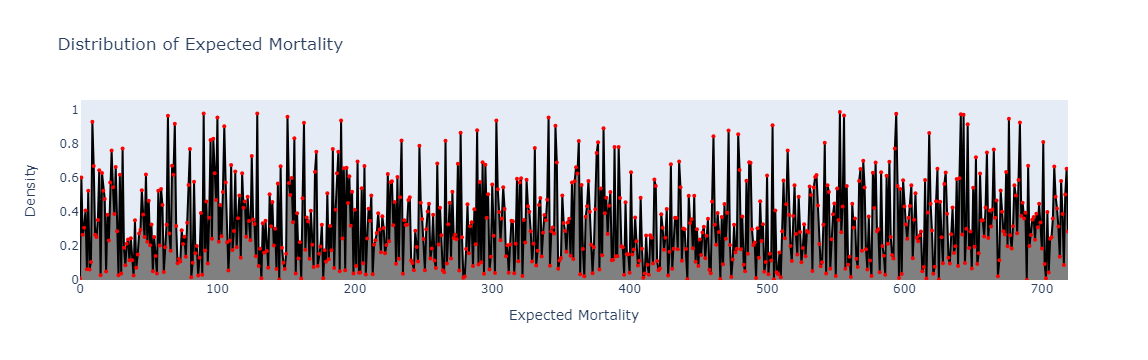

In [37]:
import plotly.express as px

fig = px.area(df_ReadmissionRegistry, y='ExpectedMortality', title='Distribution of Expected Mortality')

# Customize the chart layout
fig.update_layout(
    xaxis_title='Expected Mortality',
    yaxis_title='Density',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)


fig.update_traces(
    line=dict(color='black'),        
    fillcolor='grey',              
    hoverinfo='x',               
    hoverlabel=dict(font_size=14),      
    mode='lines+markers',               
    marker=dict(size=4, color='red'),   
)

# Show the chart
fig.show()
